# EE386 Digital Sinal Processing
## Experiment 5

In [2]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import matplotlib

from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [3]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

In [4]:
#Roll number: 191EE238
alpha = 1 + 238 % 3  
print(alpha)

2


#### Problem 1

In [33]:
f1 = 2 + 2*alpha
f2 = 5 + 5*alpha
Fs = 100
t = np.arange(0,10,1/Fs)
F = 0.3*(alpha + 1)*t + (2+2*alpha)

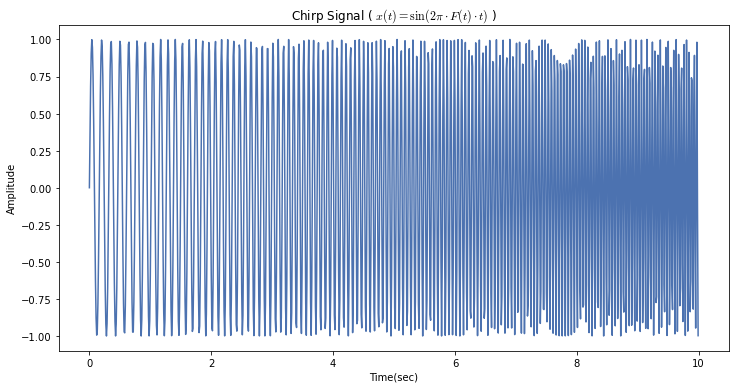

In [327]:
#Question 1
x = np.sin(2*pi*np.multiply(t,F))
plt.plot(t,x)
plt.xlabel("Time(sec)")
plt.ylabel("Amplitude") 
plt.title("Chirp Signal ( $x(t) = \sin(2\pi\cdot F(t)\cdot t)$ )")

plt.savefig("Experiment-5/Results/chirp.jpeg")

In [250]:
def plot_mag(x, Fs,norm = True, max_freq=None,Title = None, interpolate = True):
    
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
        
    X = (np.abs(np.fft.fft(x)[0:C]))
    N = Fs * np.arange(0, C) / len(x)
    
    X_norm = X
    if norm:
        X_norm = (1/C) * X;
    if interpolate:
        plt.plot(N, X_norm)
    else:
        plt.stem(N, X_norm)
    if Title:
            plt.title(Title)
        
    return N, X_norm

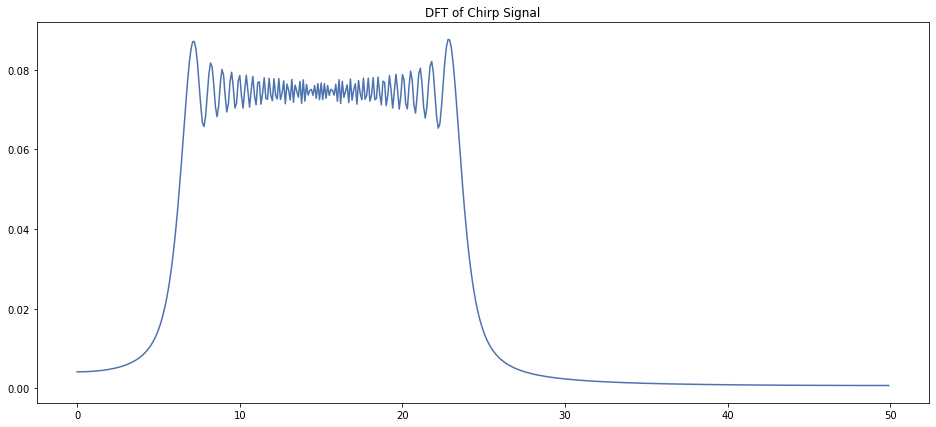

In [251]:
plt.figure(figsize = (16,7))
N, Y = plot_mag(x, Fs, norm = True,Title = "DFT of Chirp Signal")

The frequenies present are: [ 7.2  8.2  8.9  9.5 10.  10.4 10.8 11.2 11.5 11.8 12.1 12.4 12.7 12.9
 13.2 13.4 13.7 13.9 14.1 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.9 16.1
 16.3 16.6 16.8 17.1 17.3 17.6 17.9 18.2 18.5 18.8 19.2 19.6 20.  20.5
 21.1 21.8 22.8]


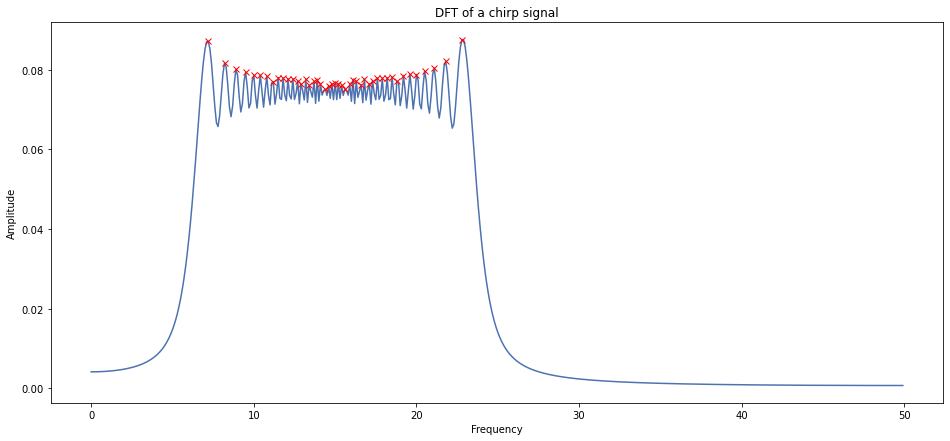

In [328]:
plt.figure(figsize = (16,7))
peak, _= sp.find_peaks(Y,threshold = 0.00005)
plt.plot(N,Y)
plt.plot(N[peak],Y[peak],'rx')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("DFT of a chirp signal")
#plt.savefig("Experiment-5/Results/Dual_tone")
print("The frequenies present are:", N[peak])

plt.savefig("Experiment-5/Results/DFT.jpeg")

In [348]:
def plot_spectro(x, Fs, Window,samples, Nperseg, Noverlap):
    
    ft, tx, Sx = sp.spectrogram(x,Fs, window = Window,nperseg = Nperseg, noverlap = Noverlap)
    
    if samples:
        plt.pcolormesh(tx[0:samples],ft[0:samples], Sx[0:samples][0:samples], shading = 'gouraud')
    else:
        plt.pcolormesh(tx,ft,Sx, shading = 'gouraud')
        
    cbar = plt.colorbar()
    cbar.set_label('Amplitude')
    cbar.minorticks_on()
    plt.xlabel("Time(sec)")
    plt.ylabel("Frequency(Hz)")
    
    return tx,ft,Sx

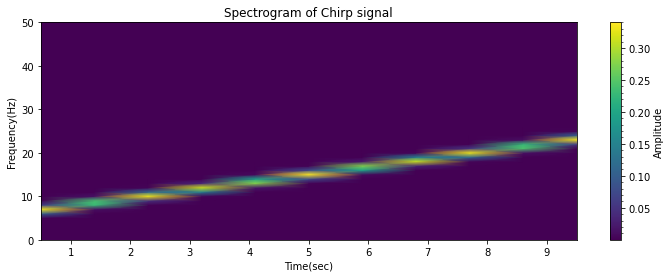

In [349]:
plt.figure(figsize = (12,4))
st, sF,Sx  = plot_spectro(x, Fs = 100, Window = 'hamming',samples = None ,Nperseg = 100, Noverlap = 10)
plt.title("Spectrogram of Chirp signal")
plt.savefig("Experiment-5/Results/chirpspect.jpeg")

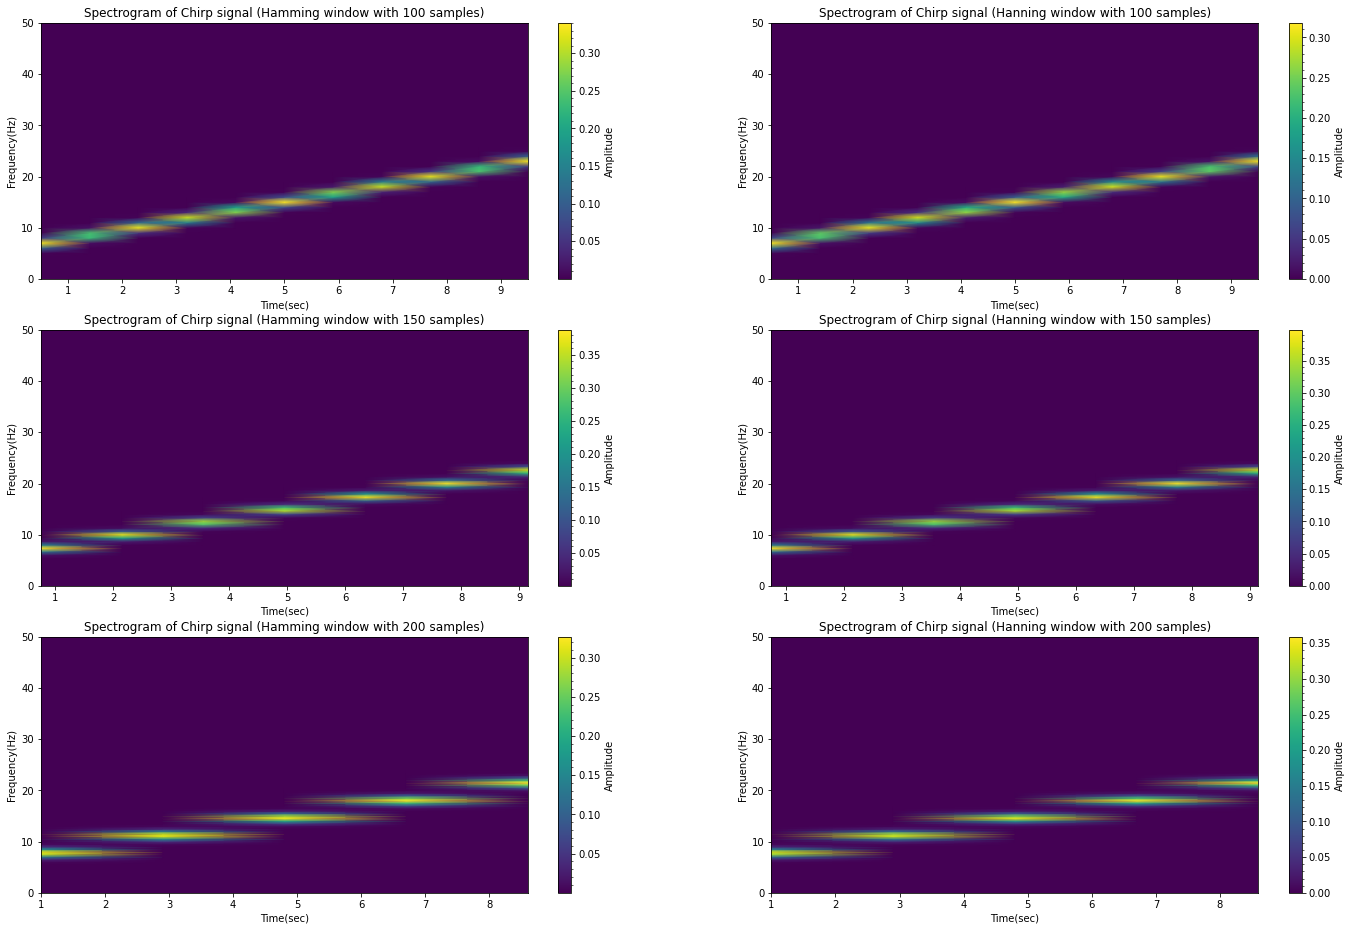

In [356]:
#Plotting spectogram using different windows and samples
plt.figure(figsize = (24,16))
plt.subplot(3,2,1)
_,_,_= plot_spectro(x, Fs = 100, Window = 'hamming',samples = None ,Nperseg = 100, Noverlap = 10)
plt.title("Spectrogram of Chirp signal (Hamming window with 100 samples)")

plt.subplot(3,2,2)
_,_,_= plot_spectro(x, Fs = 100, Window = 'hanning',samples = None ,Nperseg = 100, Noverlap = 10)
plt.title("Spectrogram of Chirp signal (Hanning window with 100 samples)")

plt.subplot(3,2,3)
_,_,_= plot_spectro(x, Fs = 100, Window = 'hamming',samples = None ,Nperseg = 150, Noverlap = 10)
plt.title("Spectrogram of Chirp signal (Hamming window with 150 samples)")

plt.subplot(3,2,4)
_,_,_= plot_spectro(x, Fs = 100, Window = 'hanning',samples = None ,Nperseg = 150, Noverlap = 10)
plt.title("Spectrogram of Chirp signal (Hanning window with 150 samples)")

plt.subplot(3,2,5)
_,_,_= plot_spectro(x, Fs = 100, Window = 'hamming',samples = None ,Nperseg = 200, Noverlap = 10)
plt.title("Spectrogram of Chirp signal (Hamming window with 200 samples)")

plt.subplot(3,2,6)
_,_,_= plot_spectro(x, Fs = 100, Window = 'hanning',samples = None ,Nperseg = 200, Noverlap = 10)
plt.title("Spectrogram of Chirp signal (Hanning window with 200 samples)")


plt.savefig("Experiment-5/Results/chirpdiff.jpeg")

#### Problem 2

In [255]:
Fs_instru, instru = wavfile.read('Experiment-5/instru2.wav')
print("Sampling frequency:",Fs_instru)
IPython.display.Audio(instru, rate = Fs_instru)

Sampling frequency: 11025


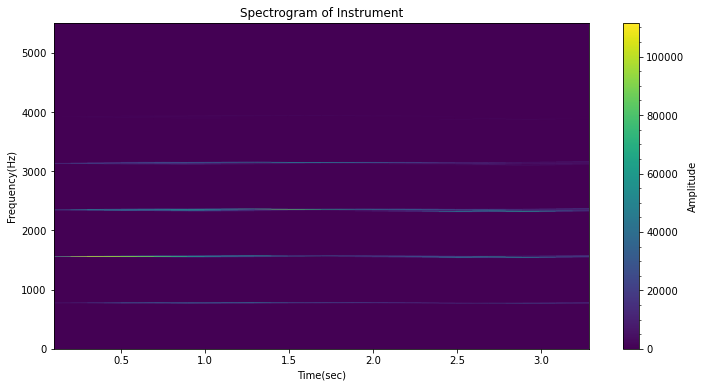

In [357]:
st, sF,Sx  = plot_spectro(instru, Fs = 11025,samples = None, Window = 'hanning', Nperseg = 2205, Noverlap = 10)
plt.title("Spectrogram of Instrument")

plt.savefig("Experiment-5/Results/ins.jpeg")

In [258]:
peak, _= sp.find_peaks(Sx[:,1],threshold = 1000)
print("Frequencies present:",sF[peak])

Frequencies present: [ 785. 1570. 2355. 3140. 3150.]


The frequenies present are: [781.51898734]


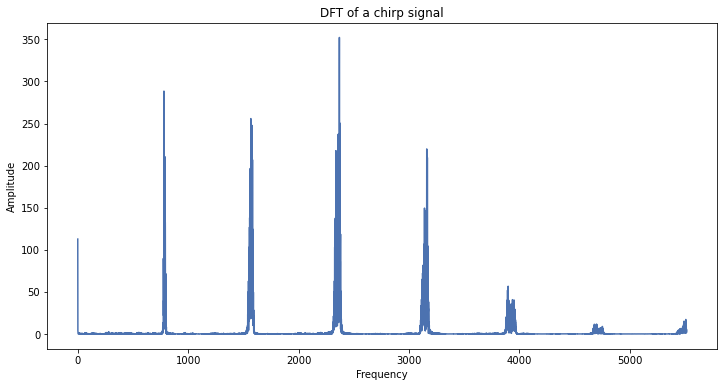

In [370]:
Ni,Yi = plot_mag(instru, Fs = 11025, norm = True,Title = "DFT of given instrument track")

peak, _= sp.find_peaks(Yi,threshold = 150)

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("DFT of a chirp signal")
#plt.savefig("Experiment-5/Results/Dual_tone")
print("The frequenies present are:", Ni[peak])

plt.savefig("Experiment-5/Results/DFT_instru.jpeg")

In [259]:
#Question 2
Fs_opera, opera = wavfile.read('Experiment-5/opera.wav')
print("Sampling frequency:",Fs_opera)
IPython.display.Audio(opera, rate = Fs_opera)

Sampling frequency: 44100


(100,) (1103,) (1103, 100)


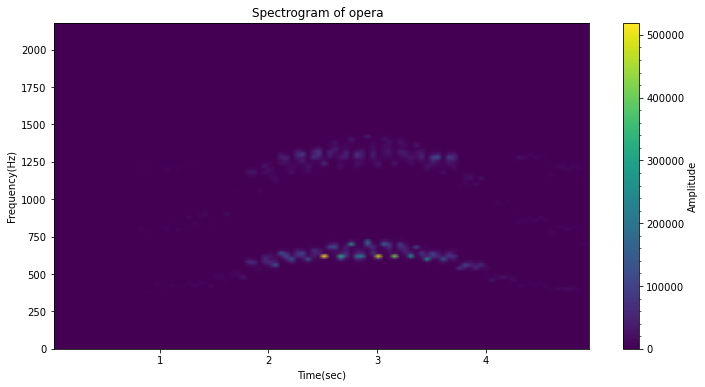

In [373]:
ot,oF,So  = plot_spectro(opera, Fs = 44100,samples = 110 , Window = 'boxcar', Nperseg = 2205, Noverlap = 10)
print(ot.shape,oF.shape,So.shape)

plt.title("Spectrogram of opera  ")
plt.savefig("Experiment-5/Results/opera.jpeg")

#### Problem 3

In [172]:
def resampler(y,new_rate, Fs):
    No_of_samples = (len(y) * new_rate)/Fs
    y_sampled = sp.resample(y,int(No_of_samples))
    
    return y_sampled

In [199]:
Fs_name, name = wavfile.read('Experiment-5/name.wav')
name = name[:,0]
print("Sampling frequency:",Fs_name)
IPython.display.Audio(name,rate = Fs_name)

Sampling frequency: 48000


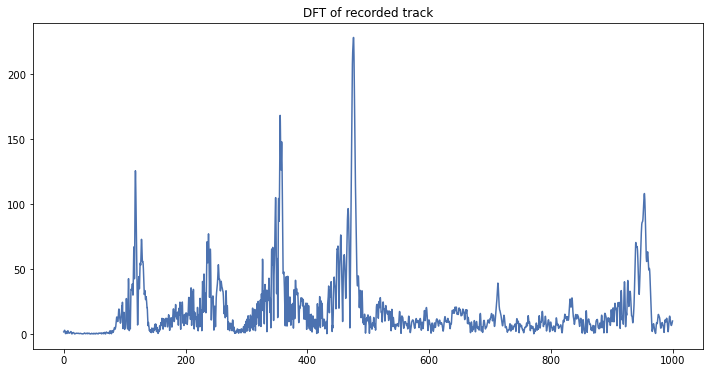

In [302]:
name_resampled = resampler(name, 4000, 48000)
Nn,Fn = plot_mag(name_resampled, Fs = 4000, max_freq = 1000,norm = True,Title = "DFT of recorded track",interpolate = True)

In [316]:
def plot_specto(x, Fs, Window,samples,Nperseg, Noverlap):
    
    ft, tx, Sx = sp.spectrogram(x,Fs, window = Window,nperseg = Nperseg, noverlap = Noverlap)

    fig = plt.figure()
    
    plt.pcolormesh(tx[0:samples],ft[0:samples], Sx[0:samples][0:samples], shading = 'gouraud')
        
    cbar = plt.colorbar()
    cbar.set_label('Amplitude')
    cbar.minorticks_on()
    plt.xlabel("Time(sec)")
    plt.ylabel("Frequency(Hz)")
    
    return tx[0:samples],ft[0:samples],Sx[0:samples][0:samples]

(16,) (150,) (150, 16)


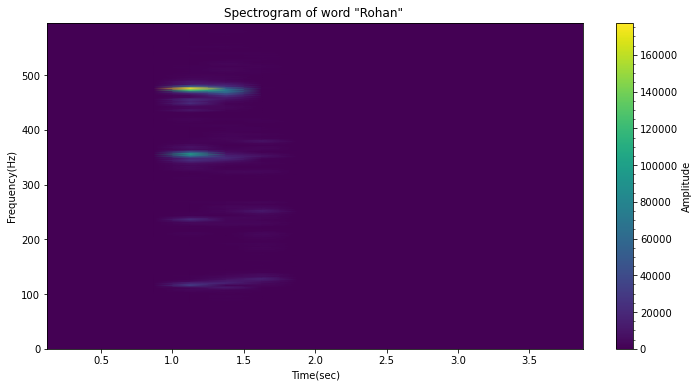

In [375]:
nt,nF,Sn  = plot_specto(name_resampled, Fs = 4000,samples= 150,Window = 'boxcar', Nperseg = 1000, Noverlap = 0)
print(nt.shape,nF.shape,Sn.shape)

plt.title("Spectrogram of word \"Rohan\" ")
plt.savefig("Experiment-5/Results/rohan_spect.jpeg")